<a href="https://colab.research.google.com/github/akpanitorobong/7089CEM---Statistical-methods-for-Data-Science/blob/main/SMDS_CW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **0: Setup and Preparation**

In [2]:
# Load Required Libraries
if (!requireNamespace("ggplot2", quietly = TRUE)) install.packages("ggplot2")
if (!requireNamespace("tidyverse", quietly = TRUE)) install.packages("tidyverse")
if (!requireNamespace("gridExtra", quietly = TRUE)) install.packages("gridExtra")

library(ggplot2)
library(tidyverse)
library(dplyr)
library(gridExtra)
# Ensure Data Directory Exists
if (!dir.exists("data")) dir.create("data")

# Download ZIP File from GitHub
zip_url <- "https://github.com/akpanitorobong/7089CEM---Statistical-methods-for-Data-Science/raw/main/data/data.zip"

zip_path <- "data.zip"

download.file(zip_url, destfile = zip_path, mode="wb" )

# Unzip Contents
unzip(zip_path)
print("Unzipped data files")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.4     ✔ tibble    3.2.1
✔ purrr     1.0.4     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




[1] "Unzipped data files"


In [3]:
X <- read.csv("data/X.csv")
y <- read.csv("data/y.csv")
time <- read.csv("data/time.csv")

In [4]:
# Convert matrices to data frames
X_df <- as.data.frame(X)
y_df <- as.data.frame(y)
time_vec <- as.vector(time)

# Assign column names
colnames(y_df) <- "y"
colnames(X_df) <- paste0("x", 1:ncol(X_df))

# Merge into one data frame
data <- cbind(time = time_vec, X_df, y = y_df$y)
write.csv(data, "combined_data.csv")

print("Data processed and merged")

[1] "Data processed and merged"


In [5]:
colnames(data)

[1] "time" "x1"   "x2"   "y"

In [6]:
head(data)

,time,x1,x2,y
,<dbl>,<dbl>,<int>,<dbl>
1,0.1,-1.3834228,0,10.677616
2,0.2,0.4911784,0,18.885513
3,0.3,-0.5288271,0,11.246081
4,0.4,-0.3594548,0,9.364583
5,0.5,0.1733400,0,13.434298
6,0.6,1.2207370,0,26.166061


In [7]:
# Use filter from dplyr
data_x0 <- data %>% filter(x2 == 0)
data_x1 <- data %>% filter(x2 == 1)
print("data split")

[1] "data split"


# **Task 1: Exploratory Data Analysis**

**Task 1.1: Time Series Plots of Input Audio and Output MEG Signal**

Input

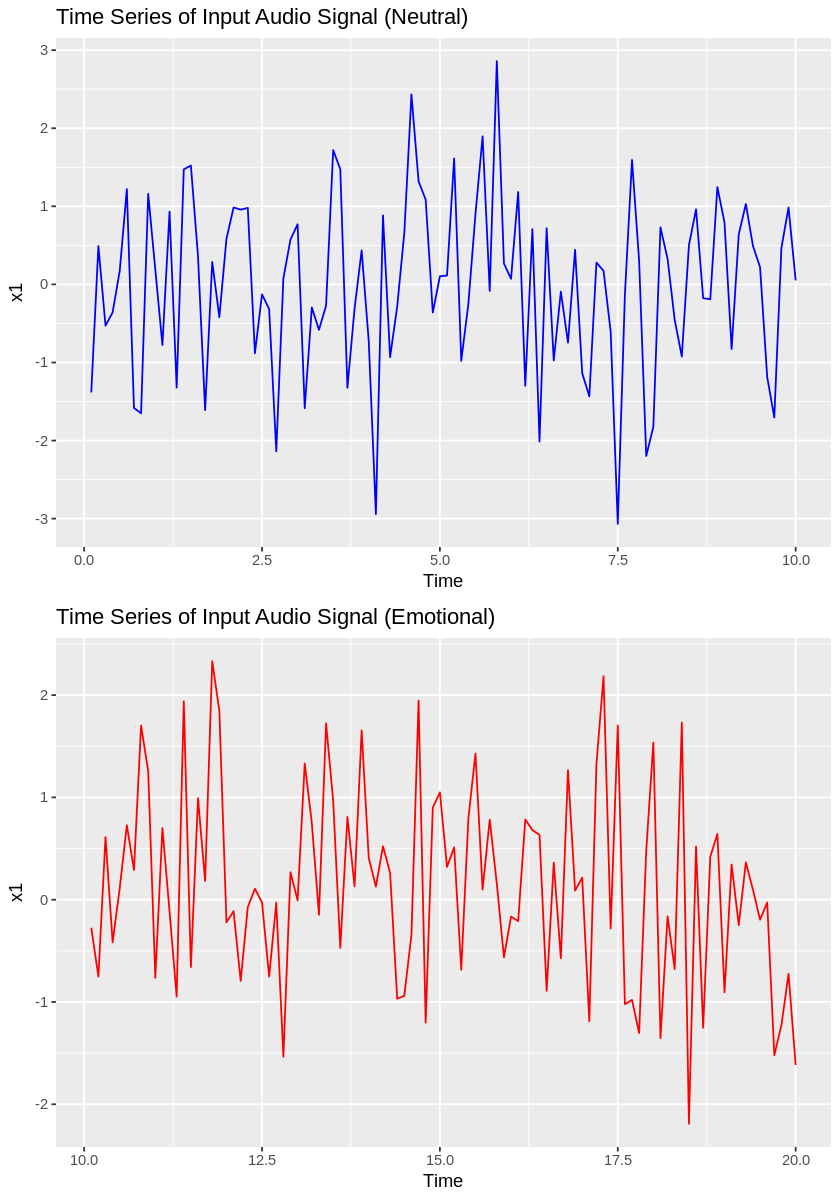

In [8]:
# Time series plot for x = 0
p0 <- ggplot(data_x0, aes(x = time, y = x1)) +
  geom_line(color = "blue") +
  labs(title = "Time Series of Input Audio Signal (Neutral)", x = "Time", y = "x1")

# Time series plot for x = 1
p1 <- ggplot(data_x1, aes(x = time, y = x1)) +
  geom_line(color = "red") +
  labs(title = "Time Series of Input Audio Signal (Emotional)", x = "Time", y = "x1")

# Display plots
library(gridExtra)
options(repr.plot.width = 7, repr.plot.height = 10)
grid.arrange(p0, p1, ncol = 1)


Output

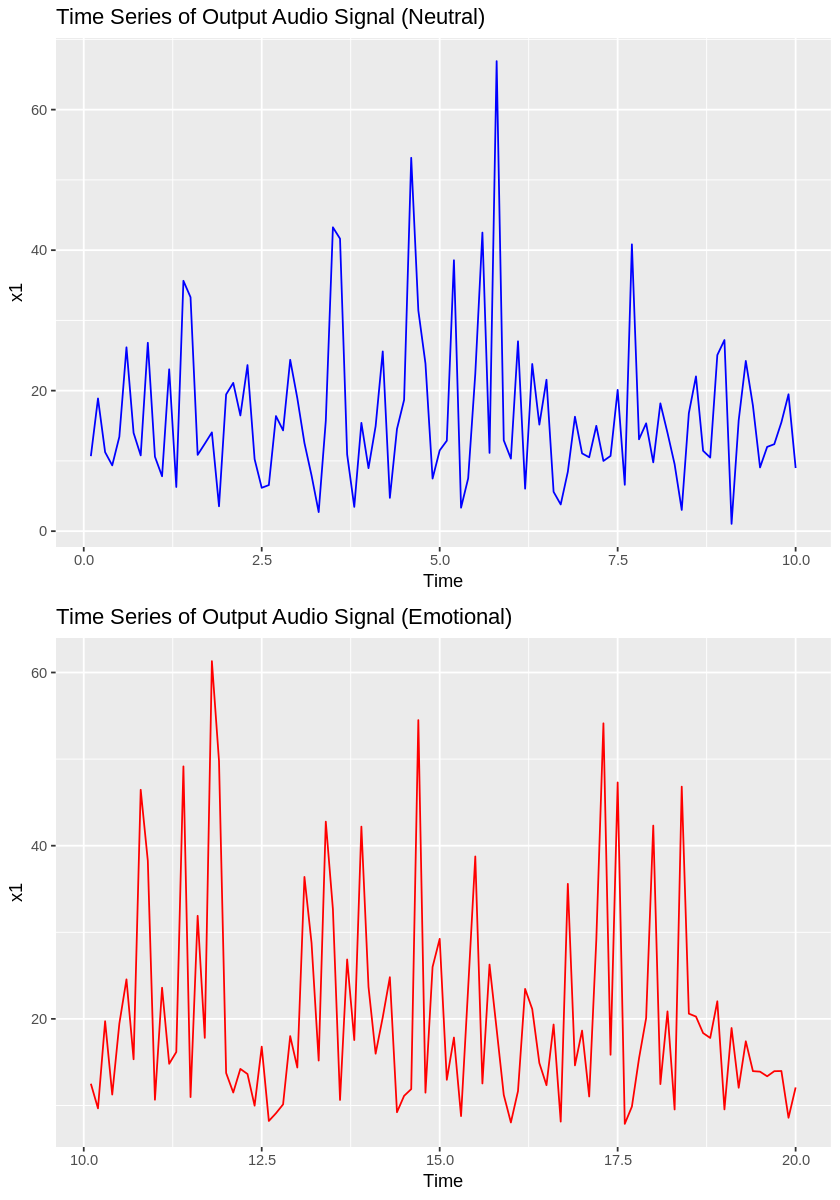

In [9]:
# Time series plot for x = 0
p0 <- ggplot(data_x0, aes(x = time, y = y)) +
  geom_line(color = "blue") +
  labs(title = "Time Series of Output Audio Signal (Neutral)", x = "Time", y = "x1")

# Time series plot for x = 1
p1 <- ggplot(data_x1, aes(x = time, y = y)) +
  geom_line(color = "red") +
  labs(title = "Time Series of Output Audio Signal (Emotional)", x = "Time", y = "x1")

# Display plots
library(gridExtra)
grid.arrange(p0, p1, ncol = 1)

**Task 1.2: Distributions for Input and Output Signals**

Input

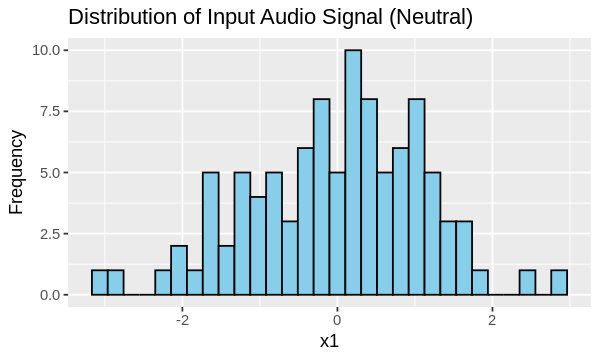

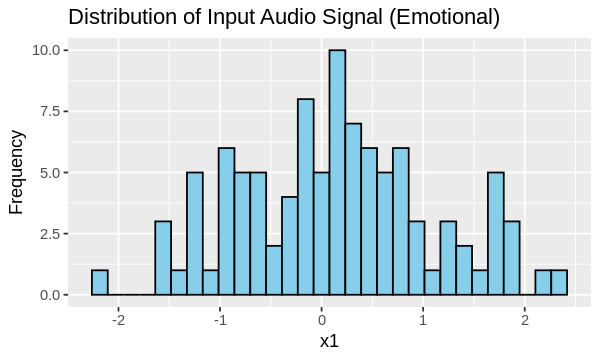

In [10]:
options(repr.plot.width = 5, repr.plot.height = 3)
# Distribution of input audio signal (x1 when x2=0)
ggplot(data_x0, aes(x = x1)) +
  geom_histogram(bins = 30, fill = "skyblue", color = "black") +
  labs(title = "Distribution of Input Audio Signal (Neutral)", x = "x1", y = "Frequency")

# Distribution of input audio signal (x1 when x2=1)
ggplot(data_x1, aes(x = x1)) +
  geom_histogram(bins = 30, fill = "skyblue", color = "black") +
  labs(title = "Distribution of Input Audio Signal (Emotional)", x = "x1", y = "Frequency")

Output

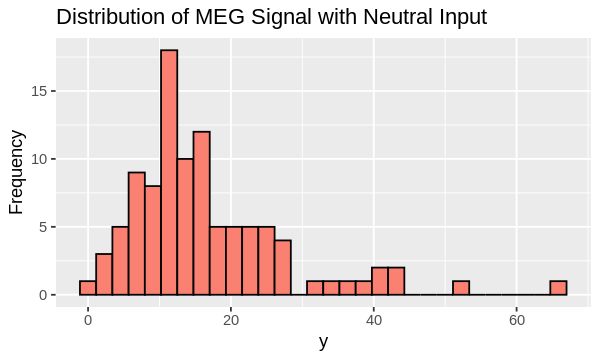

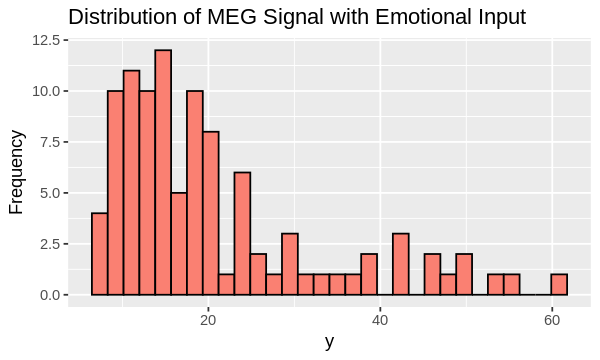

In [11]:
options(repr.plot.width = 5, repr.plot.height = 3)
# Distribution of output MEG signal (y when x2=0)
ggplot(data_x0, aes(x = y)) +
  geom_histogram(bins = 30, fill = "salmon", color = "black") +
  labs(title = "Distribution of MEG Signal with Neutral Input", x = "y", y = "Frequency")

# Distribution of output MEG signal (y when x2=1)
ggplot(data_x1, aes(x = y)) +
  geom_histogram(bins = 30, fill = "salmon", color = "black") +
  labs(title = "Distribution of MEG Signal with Emotional Input", x = "y", y = "Frequency")

**Task 1.3: Correlation and Scatter Plot Between Audio Input and Brain Signal**

[1] "Correlation between x1 and y: 0.765"


`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
`geom_smooth()` using formula = 'y ~ x'


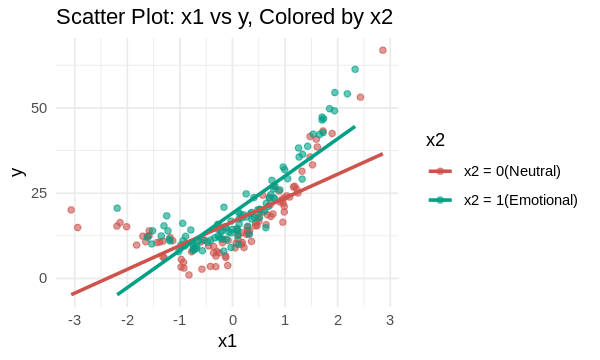

`geom_smooth()` using formula = 'y ~ x'


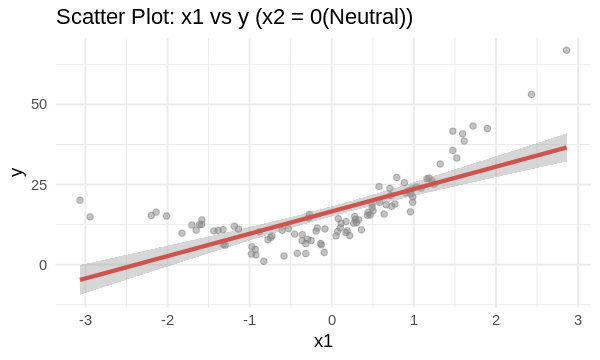

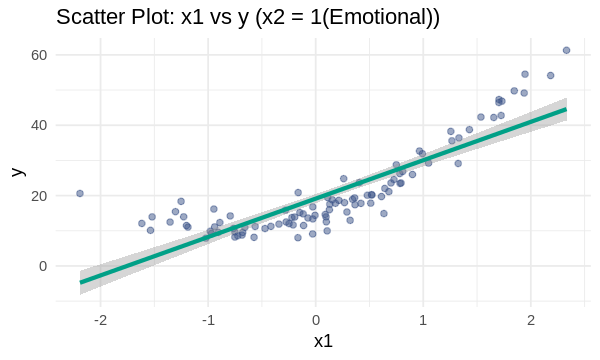

In [12]:
library(ggplot2)

# 1. Correlation between x1 and y
cor_xy <- cor(data$x1, data$y)
print(paste("Correlation between x1 and y:", round(cor_xy, 3)))

# 2. Scatter plot: x1 vs y, colored by x2
ggplot(data, aes(x = x1, y = y, color = as.factor(x2))) +
  geom_point(alpha = 0.6) +
  geom_smooth(method = "lm", se = FALSE) +
  scale_color_manual(values = c("0" = "#CD534CFF", "1" = "#00A087FF"),
                     name = "x2",
                     labels = c("x2 = 0(Neutral)", "x2 = 1(Emotional)")) +
  labs(title = "Scatter Plot: x1 vs y, Colored by x2",
       x = "x1",
       y = "y") +
  theme_minimal()

# 3. Scatter plot when x2 = 0
ggplot(data_x0, aes(x = x1, y = y)) +
  geom_point(alpha = 0.5, color = "#868686FF") +  # Gray points
  geom_smooth(method = "lm", color = "#CD534CFF", size = 1.2) +  # Red trend line
  labs(title = "Scatter Plot: x1 vs y (x2 = 0(Neutral))", x = "x1", y = "y") +
  theme_minimal()

# 4. Scatter plot when x2 = 1
ggplot(data_x1, aes(x = x1, y = y)) +
  geom_point(alpha = 0.5, color = "#3C5488FF") +  # Dark blue points
  geom_smooth(method = "lm", color = "#00A087FF", size = 1.2) +  # Teal trend line
  labs(title = "Scatter Plot: x1 vs y (x2 = 1(Emotional))", x = "x1", y = "y") +
  theme_minimal()


**Task 1.4: Boxplots of Output Brain Signal by Sound Category (x2)**

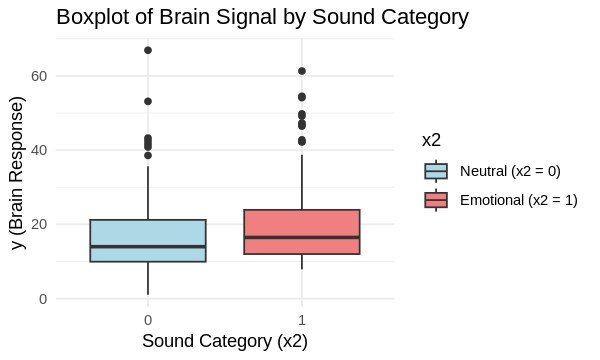

In [13]:
# Ensure x2 is treated as a factor
data$x2 <- as.factor(data$x2)

# Boxplot of y grouped by x2
ggplot(data, aes(x = x2, y = y, fill = x2)) +
  geom_boxplot() +
  scale_fill_manual(values = c("lightblue", "lightcoral"), labels = c("Neutral (x2 = 0)", "Emotional (x2 = 1)")) +
  labs(title = "Boxplot of Brain Signal by Sound Category", x = "Sound Category (x2)", y = "y (Brain Response)") +
  theme_minimal()

# **Task 2: Regression – modelling the brain response (MEG) to a sound signal**

**Task 2.1: Estimate parameters θ using Least Squares for each model**

In [14]:
# Define polynomial powers for each model
model_powers <- list(
  c(3, 5),       # Model 1
  c(1),          # Model 2
  c(1, 2, 4),    # Model 3
  c(1, 2, 3, 5), # Model 4
  c(1, 3, 4)     # Model 5
)

# Initialize storage
theta_hat_list <- list()
X_list <- list()
model_parameters_df <- data.frame(Model = 1:5,
                                  Theta_1 = NA,
                                  Theta_2 = NA,
                                  Theta_3 = NA,
                                  Theta_4 = NA,
                                  Theta_5 = NA,
                                  Theta_bias = NA)

# Parameter estimation loop
for (i in 1:5) {
  powers <- model_powers[[i]]

  # Construct design matrix
  X <- matrix(1, nrow = nrow(data))  # Intercept
  for (p in powers) {
    X <- cbind(X, data$x1^p)
  }
  X <- cbind(X, data$x2)  # x2 always included
  X_list[[i]] <- X

  # Estimate theta using Least Squares
  theta_hat <- solve(t(X) %*% X) %*% t(X) %*% data$y
  theta_hat_list[[i]] <- theta_hat

  # Assign estimated parameters to table
  model_parameters_df[i, 2:(ncol(X))] <- as.vector(theta_hat[2:ncol(X)])
  model_parameters_df[i, "Theta_bias"] <- theta_hat[1]
}
write.csv(model_parameters_df, "model_parameters.csv")
print(model_parameters_df)

  Model  Theta_1    Theta_2    Theta_3    Theta_4  Theta_5 Theta_bias
1     1 5.171273 -0.5373253  2.2020179         NA       NA  14.733733
2     2 8.629107  2.8139869         NA         NA       NA  13.821603
3     3 8.552161  6.2469171 -0.2829631 4.15988326       NA   6.013813
4     4 9.353973  4.6469620 -0.5779216 0.07479626 4.343216   6.510066
5     5 8.079458  0.3144501  0.5592050 3.96814553       NA  10.163580


**Task 2.2: Calculate Residual Sum of Squares (RSS)**

In [15]:
rss_list <- list()

for (i in 1:5) {
  y_pred <- X_list[[i]] %*% theta_hat_list[[i]]
  residuals <- data$y - y_pred
  rss_list[[i]] <- sum(residuals^2)
}

print(rss_list)

[[1]]
[1] 11825.42

[[2]]
[1] 11238.95

[[3]]
[1] 1636.168

[[4]]
[1] 1902.063

[[5]]
[1] 4928.312



**Task 2.3: Compute Log-Likelihood**

In [16]:
log_likelihood_list <- list()
n <- nrow(data)

for (i in 1:5) {
  RSS <- rss_list[[i]]
  sigma_hat2 <- RSS / n
  log_likelihood <- -n/2 * log(2 * pi) - n/2 * log(sigma_hat2) - RSS / (2 * sigma_hat2)
  log_likelihood_list[[i]] <- log_likelihood
}

print(log_likelihood_list)

[[1]]
[1] -691.7567

[[2]]
[1] -686.67

[[3]]
[1] -493.9672

[[4]]
[1] -509.0254

[[5]]
[1] -604.2312



**Task 2.4: Compute AIC and BIC**

In [17]:
aic_list <- bic_list <- list()

for (i in 1:5) {
  k <- ncol(X_list[[i]])  # number of parameters
  ll <- log_likelihood_list[[i]]
  aic_list[[i]] <- 2 * k - 2 * ll
  bic_list[[i]] <- k * log(n) - 2 * ll
}
print("AIC List")
aic_list
print("BIC List")
bic_list

[1] "AIC List"


[[1]]
[1] 1391.513

[[2]]
[1] 1379.34

[[3]]
[1] 997.9343

[[4]]
[1] 1030.051

[[5]]
[1] 1218.462

[1] "BIC List"


[[1]]
[1] 1404.707

[[2]]
[1] 1389.235

[[3]]
[1] 1014.426

[[4]]
[1] 1049.841

[[5]]
[1] 1234.954

**Task 2.5: Residual distribution plots and Q-Q plots**

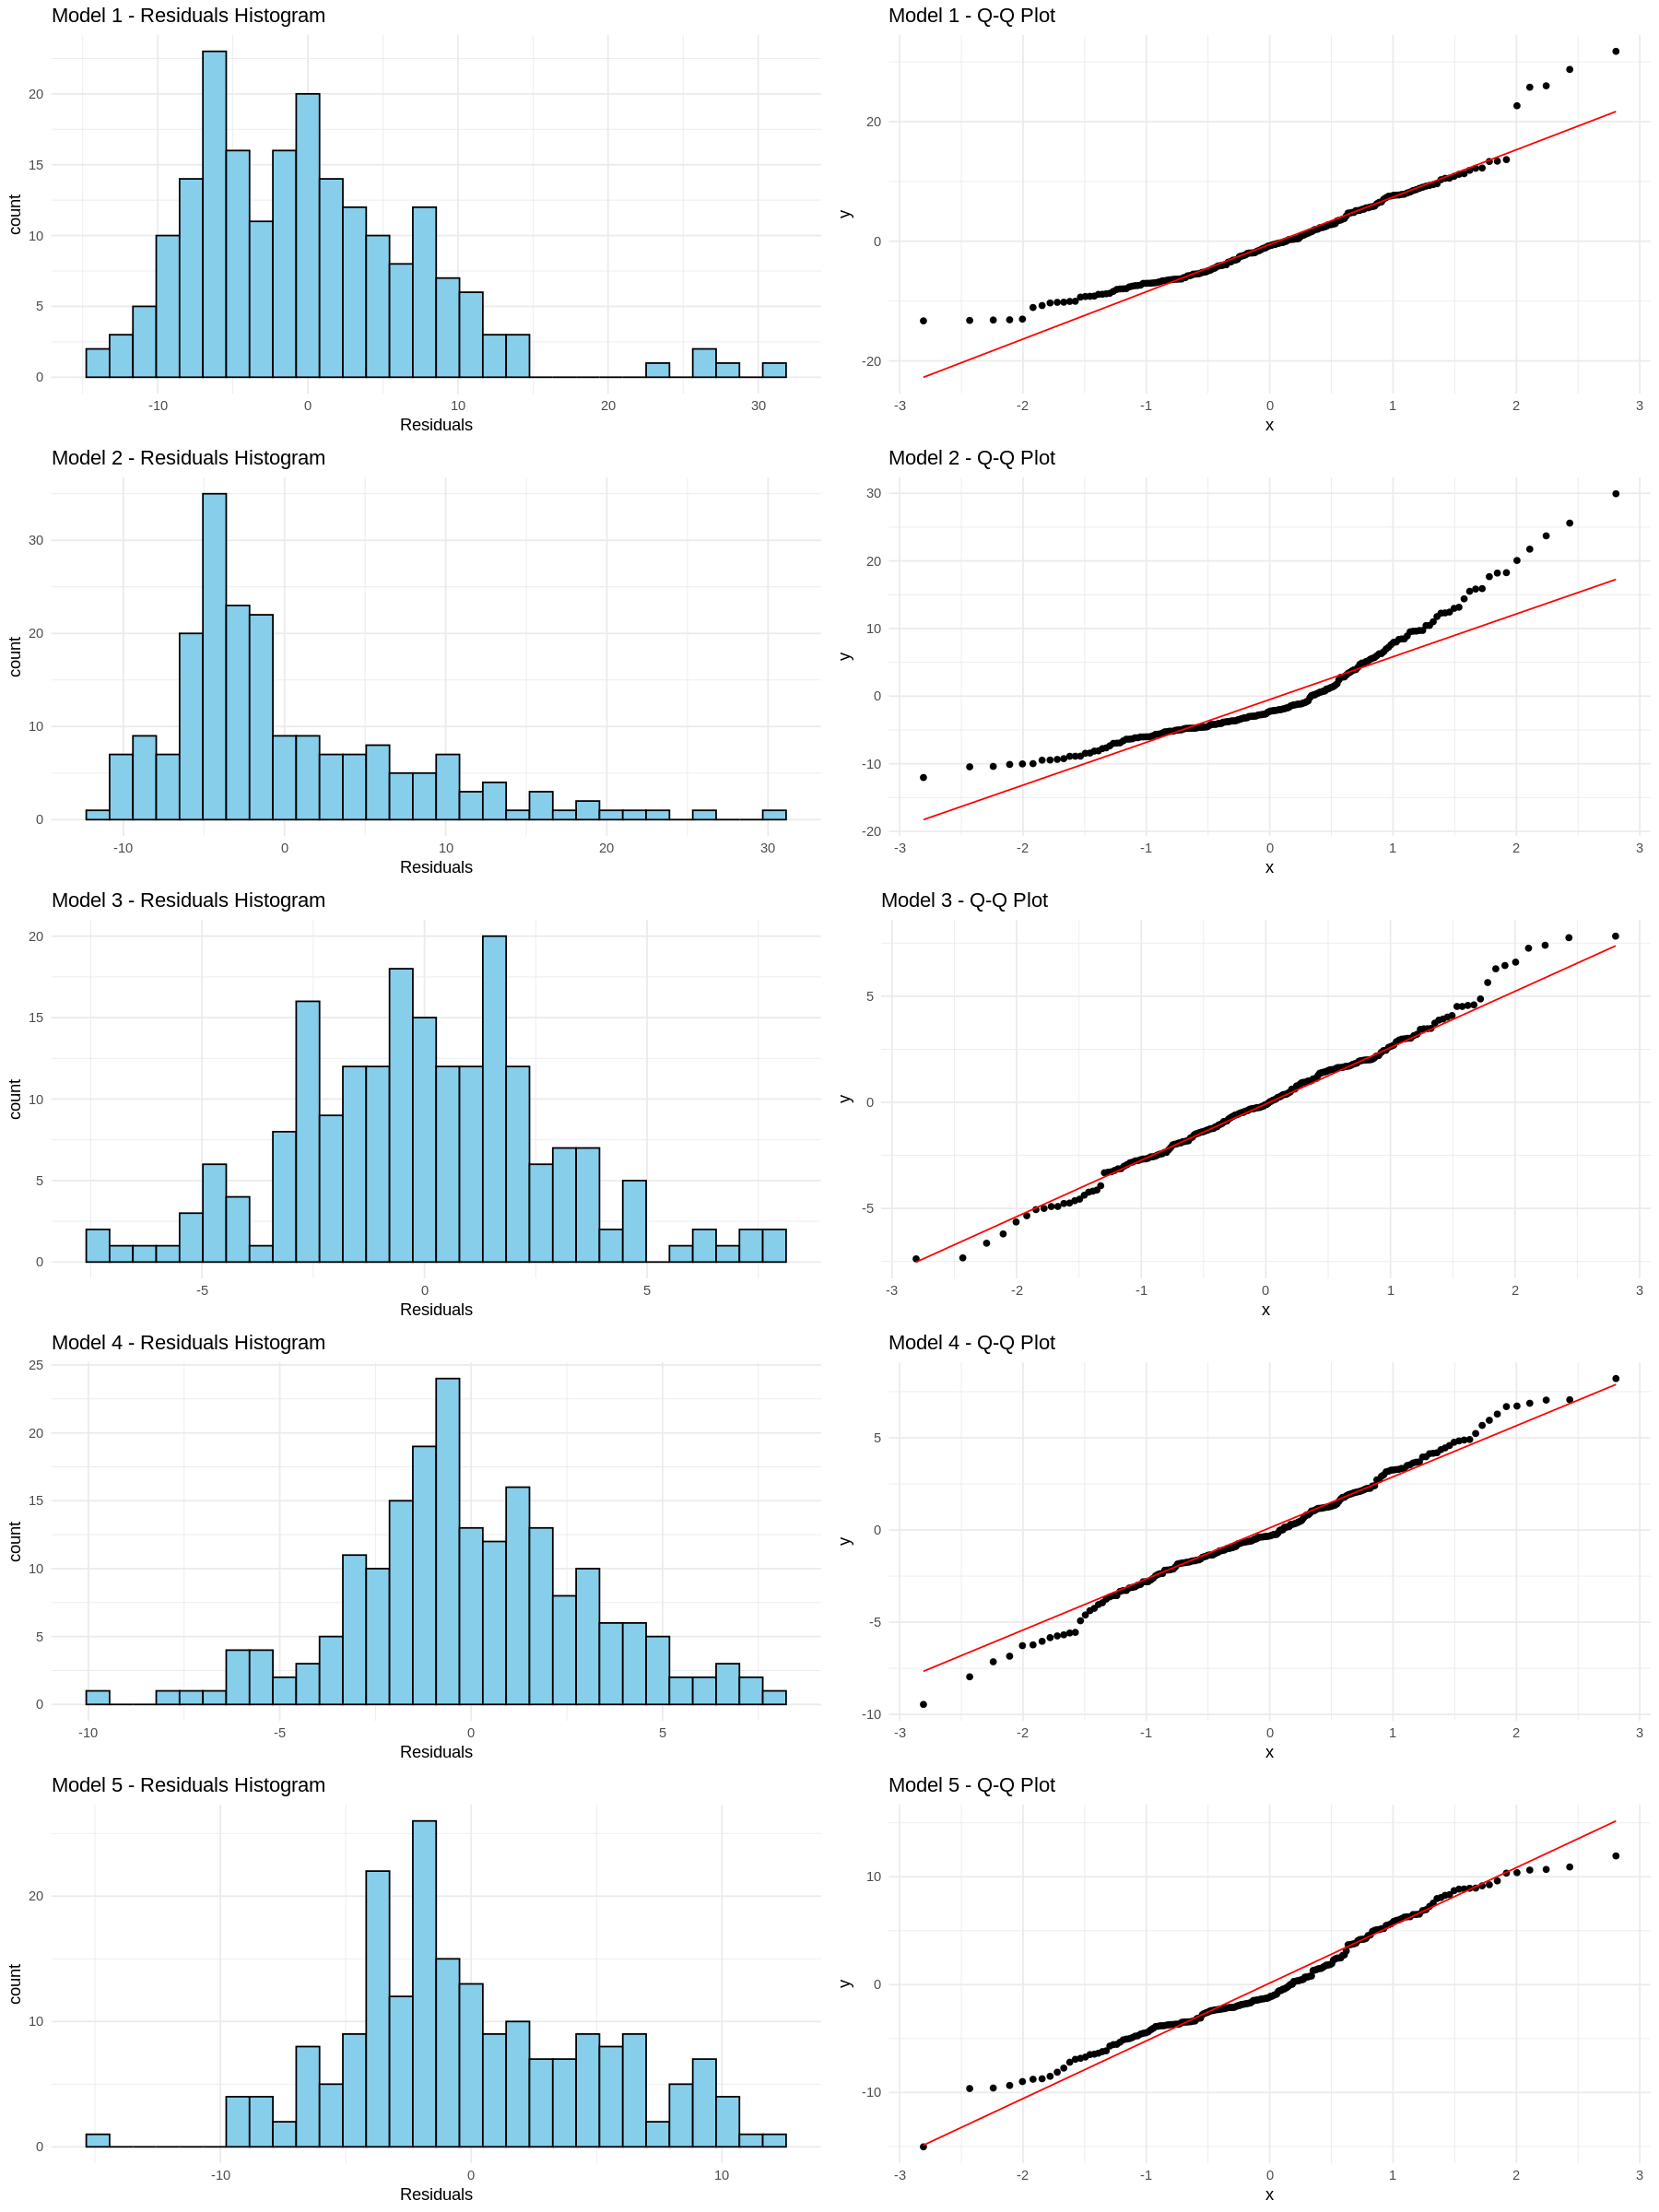

In [18]:

# Collect all plots
plots <- list()

for (i in 1:5) {
  X <- X_list[[i]]
  theta_hat <- theta_hat_list[[i]]
  y_pred <- X %*% theta_hat
  residuals <- data$y - y_pred

  # Convert to data frame for ggplot
  res_df <- data.frame(residuals = residuals)

  # Histogram
  p_hist <- ggplot(res_df, aes(x = residuals)) +
    geom_histogram(bins = 30, fill = "skyblue", color = "black") +
    ggtitle(paste("Model", i, "- Residuals Histogram")) +
    xlab("Residuals") + theme_minimal()

  # Q-Q Plot
  p_qq <- ggplot(res_df, aes(sample = residuals)) +
    stat_qq() + stat_qq_line(col = "red") +
    ggtitle(paste("Model", i, "- Q-Q Plot")) +
    theme_minimal()

  # Add to list
  plots[[length(plots) + 1]] <- p_hist
  plots[[length(plots) + 1]] <- p_qq
}

options(repr.plot.width = 15, repr.plot.height = 20)
# Arrange all 10 plots in a grid (5 rows, 2 columns)
grid.arrange(grobs = plots, ncol = 2, nrow = 5)

**Task 2.6: Select the Best Model**

In [19]:
# Combine AIC and BIC into a data frame
model_comparison <- data.frame(
  Model = paste("Model", 1:5),
  AIC = sapply(aic_list, as.numeric),
  BIC = sapply(bic_list, as.numeric)
)

# Find model with minimum AIC and BIC
model_comparison$Best_AIC <- model_comparison$AIC == min(model_comparison$AIC)
model_comparison$Best_BIC <- model_comparison$BIC == min(model_comparison$BIC)

# Display the result
print(model_comparison)

    Model       AIC      BIC Best_AIC Best_BIC
1 Model 1 1391.5133 1404.707    FALSE    FALSE
2 Model 2 1379.3401 1389.235    FALSE    FALSE
3 Model 3  997.9343 1014.426     TRUE     TRUE
4 Model 4 1030.0508 1049.841    FALSE    FALSE
5 Model 5 1218.4623 1234.954    FALSE    FALSE


In [20]:
best_model <- model_comparison[model_comparison$Best_AIC & model_comparison$Best_BIC, ]
cat("Best model is", best_model$Model, "\n")
best_model_index <- 3#index used with model training

Best model is Model 3 


In [21]:
# Combine all the results into a data frame using the precomputed values
model_stats_df <- data.frame(
  Model = 1:5,
  RSS = unlist(rss_list),
  Log_Likelihood = unlist(log_likelihood_list),
  AIC = unlist(aic_list),
  BIC = unlist(bic_list)
)

# Print the data frame to check the results
cat("\nModel Performance Metrics:\n")
print(model_stats_df)

# Save the data frame to a CSV file
write.csv(model_stats_df, "model_performance_metrics.csv", row.names = FALSE)


Model Performance Metrics:
  Model       RSS Log_Likelihood       AIC      BIC
1     1 11825.421      -691.7567 1391.5133 1404.707
2     2 11238.950      -686.6700 1379.3401 1389.235
3     3  1636.168      -493.9672  997.9343 1014.426
4     4  1902.063      -509.0254 1030.0508 1049.841
5     5  4928.312      -604.2312 1218.4623 1234.954


**Task 2.7: Train/Test split and confidence intervals**

**Task 2.7.1 Split the data into training and testing sets (70% / 30%)**

In [22]:
set.seed(42)  # for reproducibility

n <- nrow(data)
train_indices <- sample(1:n, size = floor(0.7 * n))#training data = 70%
test_indices <- setdiff(1:n, train_indices)

data_train <- data[train_indices, ]
data_test <- data[test_indices, ]

**Task 2.7.2 Build the best model’s design matrix for training and testing**

In [23]:
powers <- model_powers[[best_model_index]]

# Design matrix for training
X_train <- matrix(1, nrow = nrow(data_train))  # Intercept
for (p in powers) {
  X_train <- cbind(X_train, data_train$x1^p)
}
X_train <- cbind(X_train, data_train$x2)

# Design matrix for testing
X_test <- matrix(1, nrow = nrow(data_test))  # Intercept
for (p in powers) {
  X_test <- cbind(X_test, data_test$x1^p)
}
X_test <- cbind(X_test, data_test$x2)

**Task 2.7.3 Estimate model parameters using training data**

In [24]:
theta_hat_best <- solve(t(X_train) %*% X_train) %*% t(X_train) %*% data_train$y

**Task 2.7.4 Compute predictions on test data**

In [25]:
y_pred_test <- X_test %*% theta_hat_best

**Task 2.7.5 Compute 95% prediction confidence intervals**

In [26]:
# Compute residual variance using training data
residuals_train <- data_train$y - X_train %*% theta_hat_best
sigma2_hat <- sum(residuals_train^2) / (nrow(X_train) - length(theta_hat_best))

# Standard error for predictions
se_pred <- sqrt(diag(X_test %*% solve(t(X_train) %*% X_train) %*% t(X_test)) * sigma2_hat)

# 95% Confidence Intervals
lower_bound <- y_pred_test - 1.96 * se_pred
upper_bound <- y_pred_test + 1.96 * se_pred

**2.7.6 Plot predictions with 95% confidence intervals**

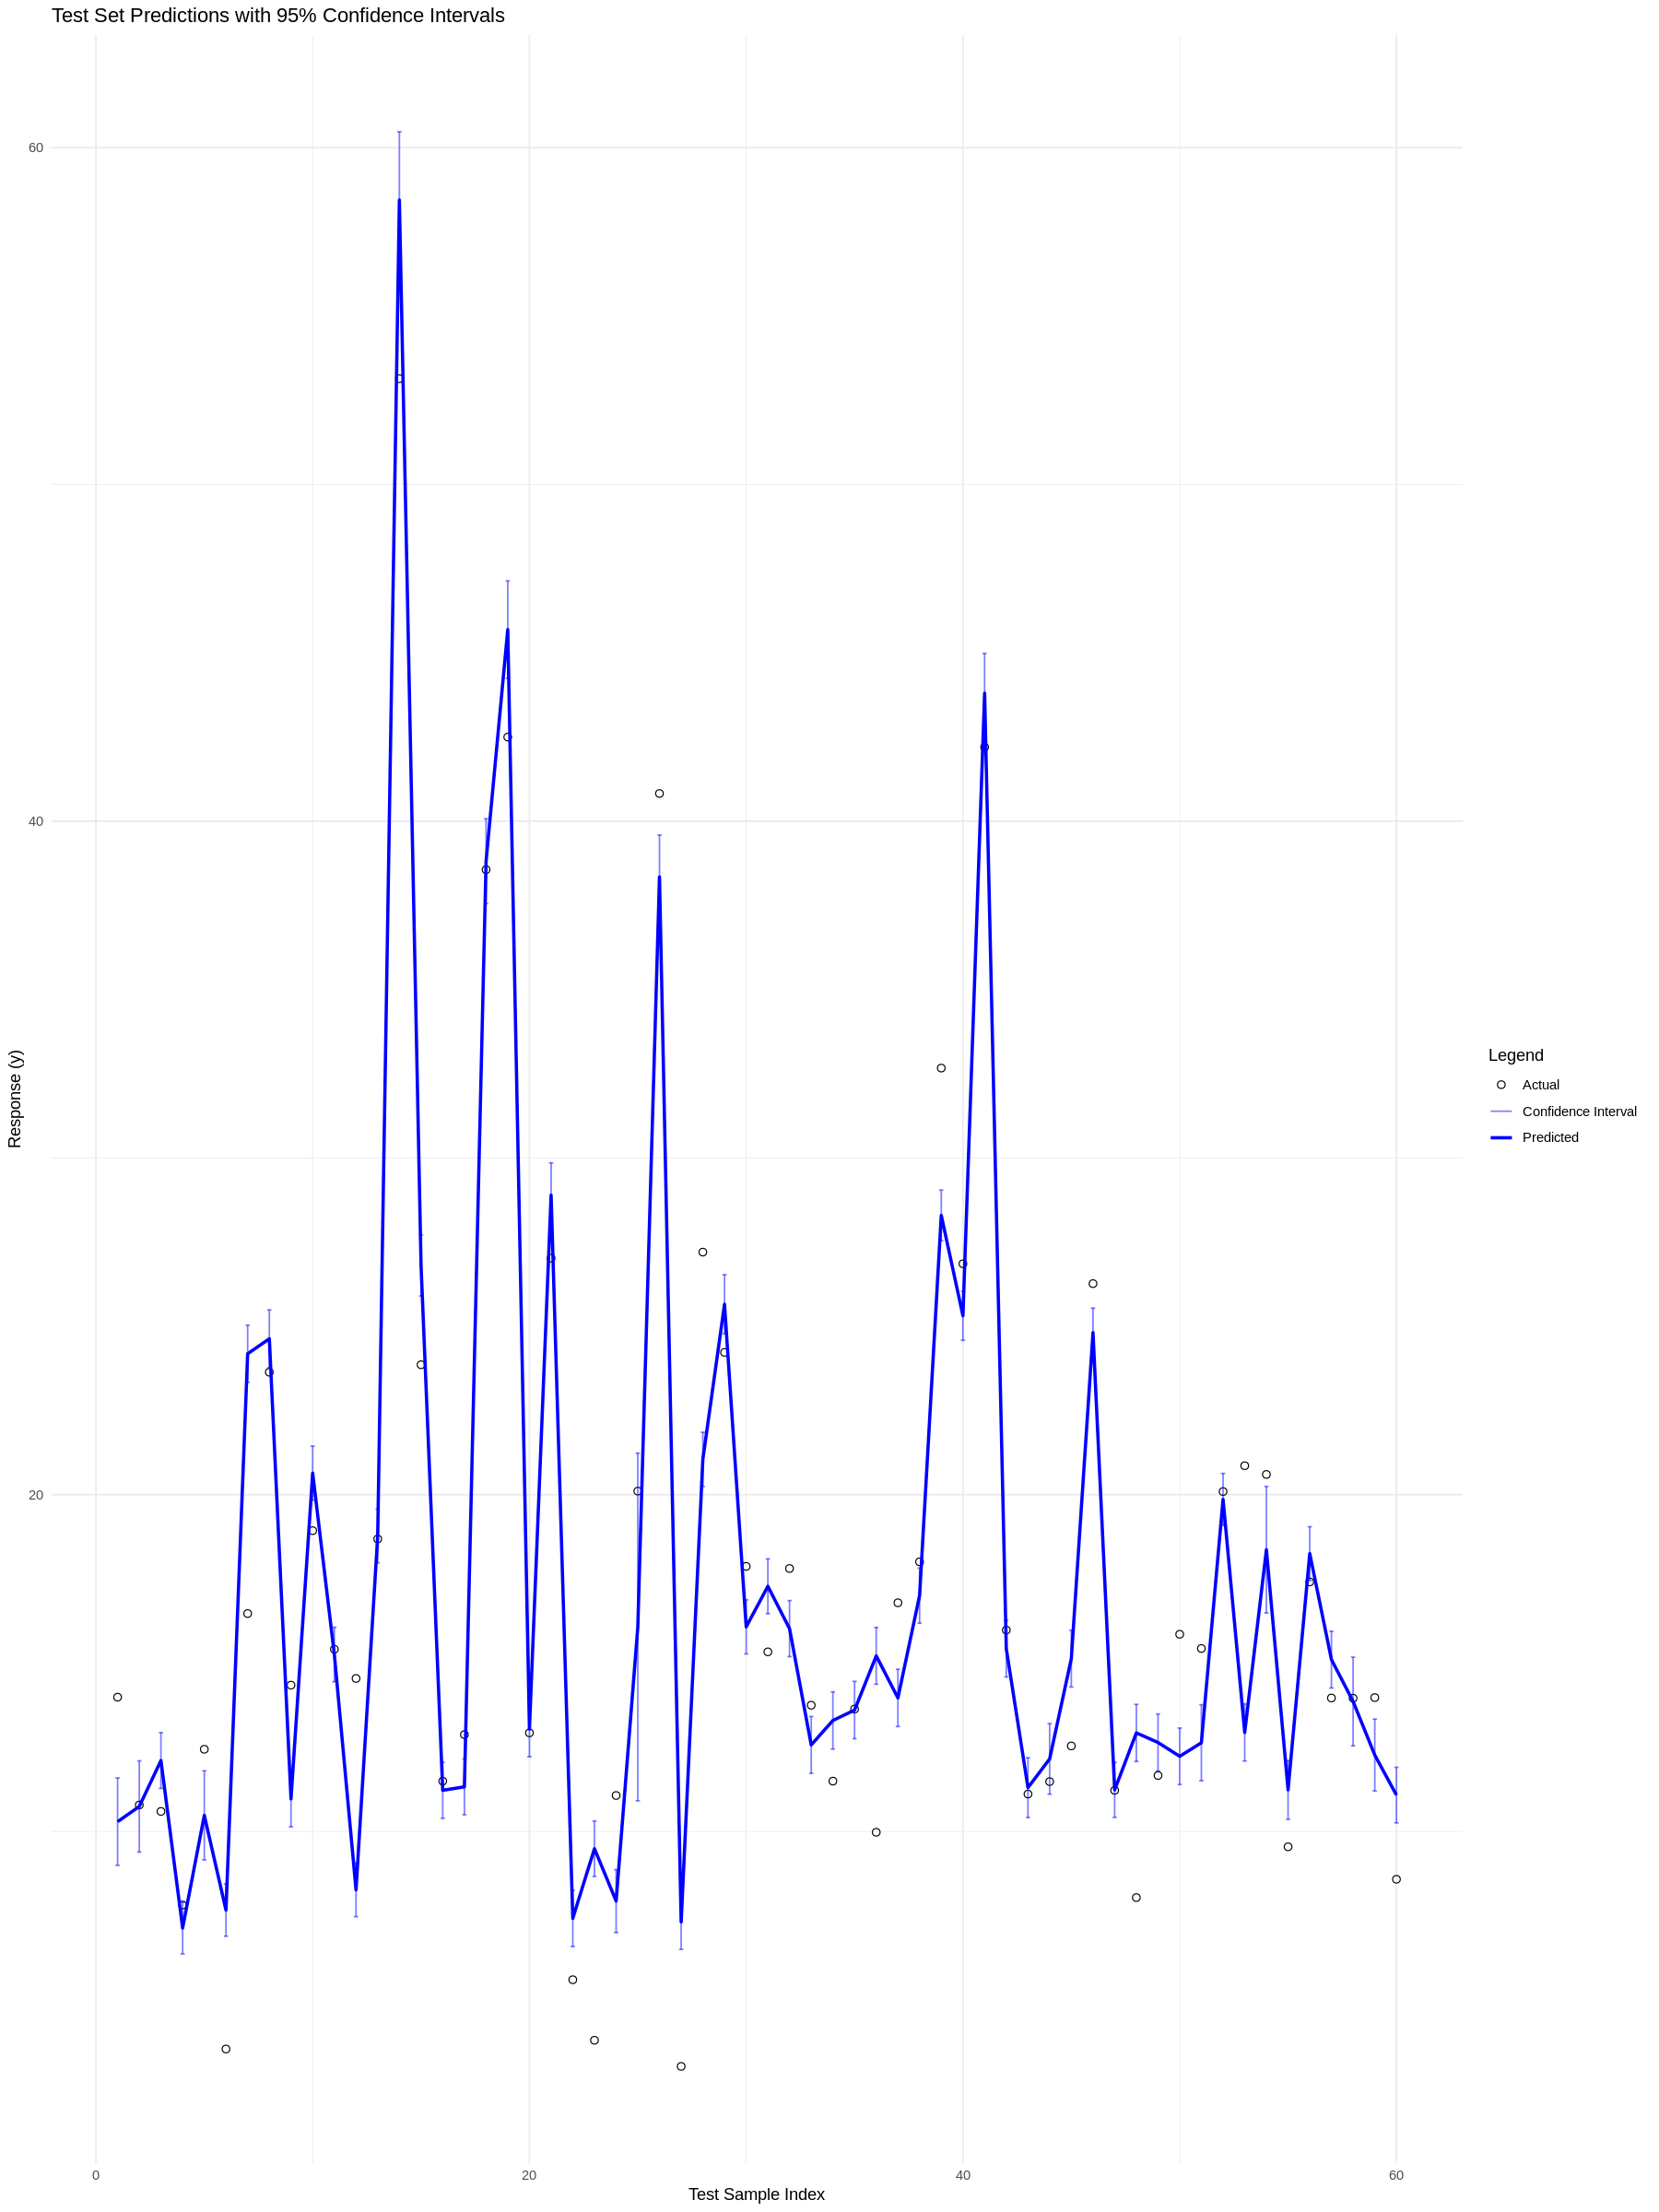

In [27]:
plot_df <- data.frame(
  Index = 1:length(y_pred_test),
  Predicted = as.vector(y_pred_test),
  Lower = as.vector(lower_bound),
  Upper = as.vector(upper_bound),
  Actual = data_test$y
)

ggplot(plot_df, aes(x = Index)) +
  geom_point(aes(y = Actual, color = "Actual"), shape = 1, size = 2) +
  geom_line(aes(y = Predicted, color = "Predicted"), size = 1) +
  geom_errorbar(aes(ymin = Lower, ymax = Upper, color = "Confidence Interval"), width = 0.2, alpha = 0.5) +
  scale_color_manual(name = "Legend",
                     values = c("Actual" = "black",
                                "Predicted" = "blue",
                                "Confidence Interval" = "blue")) +
  labs(title = "Test Set Predictions with 95% Confidence Intervals",
       y = "Response (y)", x = "Test Sample Index") +
  theme_minimal()

# **Task 3: Approximate Bayesian Computation (ABC)**

**Task 3.1: Identify the 2 parameters with largest absolute values in theta_hat**

In [28]:
# --- Step 1: Setup and Select Top 2 Parameters ---
# Get Model 3's estimated parameters from Task 2.1
theta_hat_model3 <- theta_hat_list[[3]]

# Get model parameters excluding the bias term
theta_no_bias <- theta_hat_model3[-1]  # remove bias (first element)
names(theta_no_bias) <- c("x1", "x1^2", "x1^4", "x2")  # name the parameters

# Find the indices of the 2 largest absolute values
top2_indices <- order(abs(theta_no_bias), decreasing = TRUE)[1:2]

# Display the selected parameters for ABC
cat("Selected parameters for ABC (based on largest absolute values):\n")
cat("Parameter names:", names(theta_no_bias)[top2_indices], "\n")
cat("Parameter values:", theta_no_bias[top2_indices], "\n")

Selected parameters for ABC (based on largest absolute values):
Parameter names: x1 x1^2 
Parameter values: 8.552161 6.246917 


**Task 3.2: Define prior distributions for the top two parameters**

In [29]:
# Define prior range: +/- 30% of LS estimates
top2_vals <- theta_no_bias[top2_indices]  # The actual theta values

prior_ranges <- lapply(top2_vals, function(val) {
  lower <- val * 0.7
  upper <- val * 1.3
  return(c(lower, upper))
})

# Sample from the prior
set.seed(42)  # For reproducibility
n_samples <- 10000
prior_samples <- data.frame(
  theta1 = runif(n_samples, prior_ranges[[1]][1], prior_ranges[[1]][2]),
  theta2 = runif(n_samples, prior_ranges[[2]][1], prior_ranges[[2]][2])
)

**Task 3.3: Build Design Matrix for Model 3 (Training Data)**

In [30]:
# Use model powers for Model 3: x1, x1^2, x1^4, x2
X_train_model3 <- cbind(
  1,
  data_train$x1,
  data_train$x1^2,
  data_train$x1^4,
  data_train$x2
)

y_train <- data_train$y

# Fixed parameters (all except top 2)
fixed_theta <- theta_hat_model3
fixed_theta_indices <- setdiff(2:5, top2_indices + 1)  # Adjust for bias at index 1

**Task 3.4: Perform Rejection ABC**

In [31]:
# Compute predictions and distances
epsilon <- quantile(rep(0, n_samples), 0.01)  # Initial dummy, will be replaced
distances <- numeric(n_samples)

for (i in 1:n_samples) {
  theta_temp <- fixed_theta

  # Insert sample into correct positions (add 1 because of intercept at position 1)
  theta_temp[top2_indices[1] + 1] <- prior_samples$theta1[i]
  theta_temp[top2_indices[2] + 1] <- prior_samples$theta2[i]

  y_pred <- X_train_model3 %*% theta_temp
  distances[i] <- sqrt(sum((y_pred - y_train)^2))  # Euclidean distance
}

# Choose threshold (e.g., accept top 1% lowest distances)
threshold <- quantile(distances, 0.01)

# Accept samples
accepted_indices <- which(distances <= threshold)
posterior_samples <- prior_samples[accepted_indices, ]

**Task 3.5: Plot the posterior distributions**

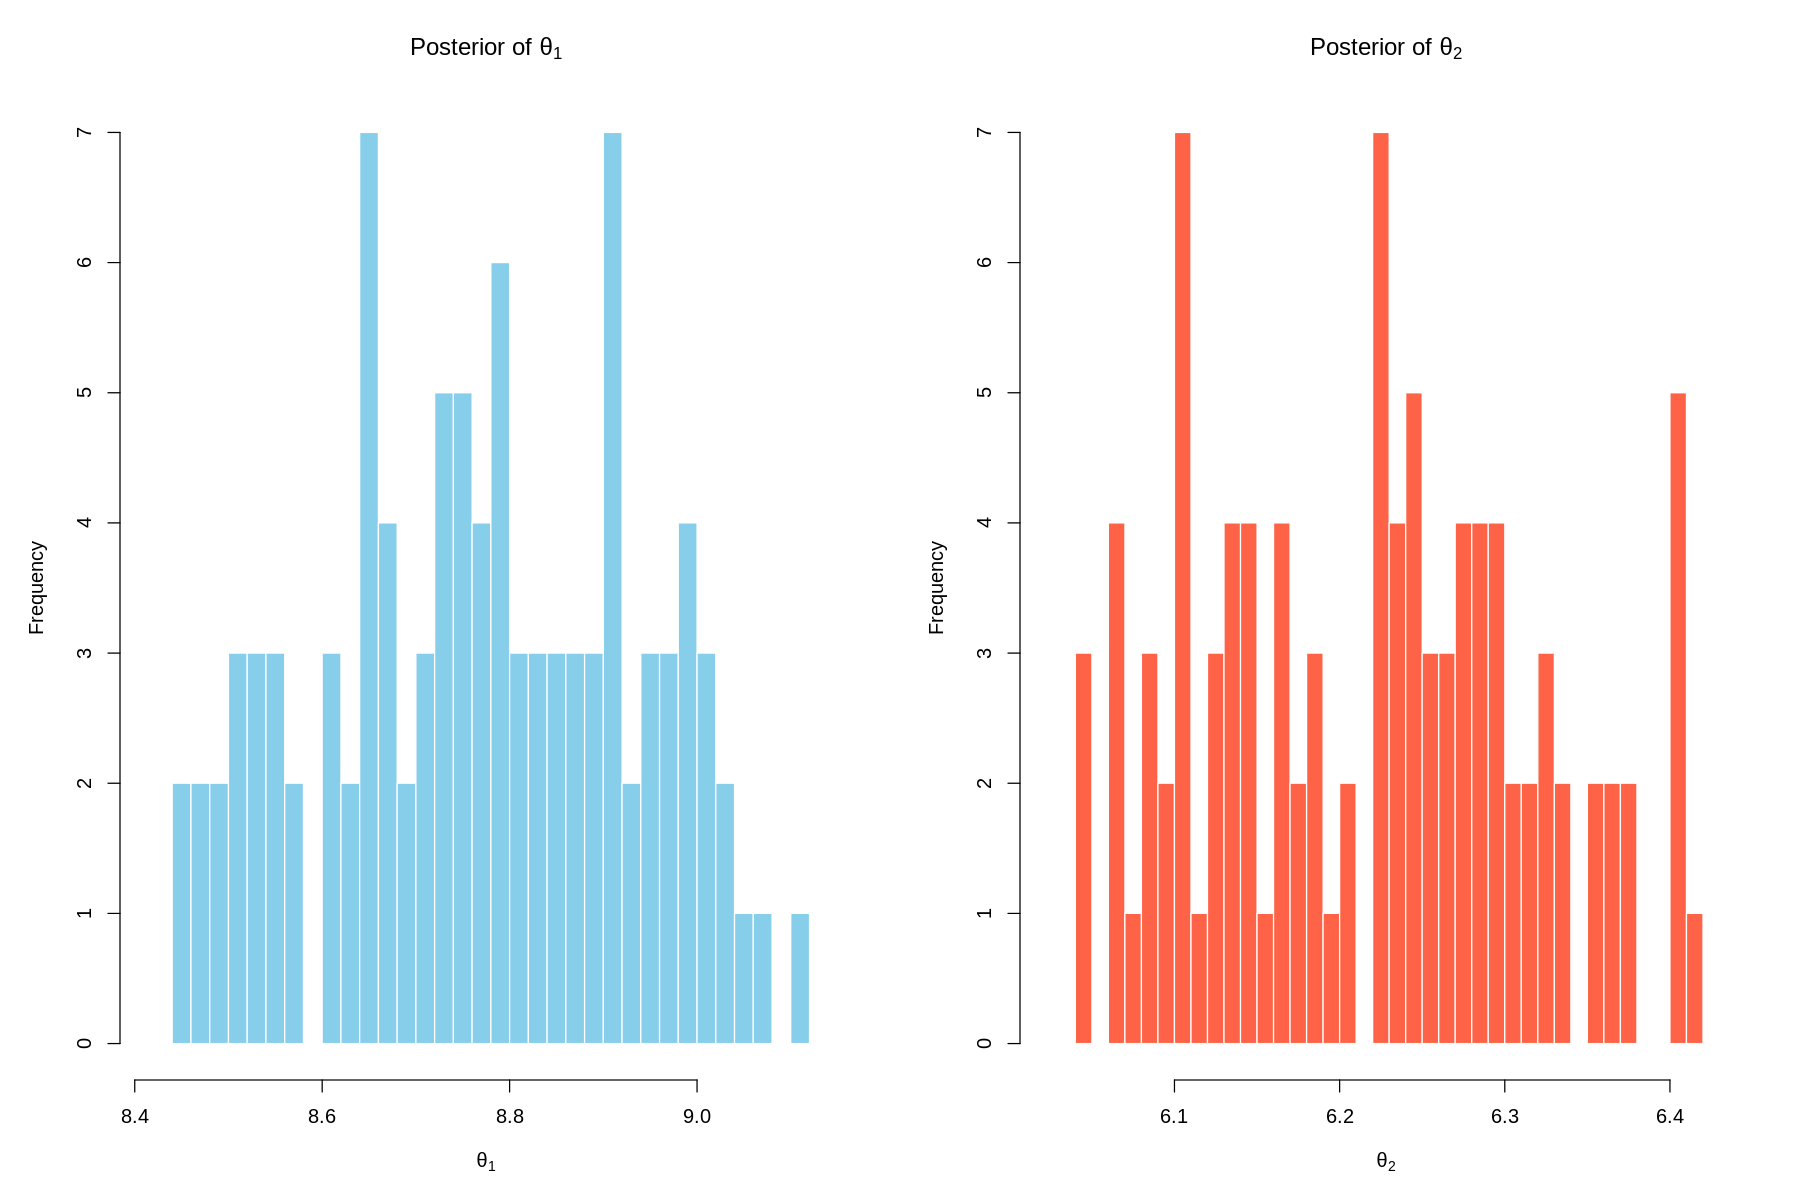

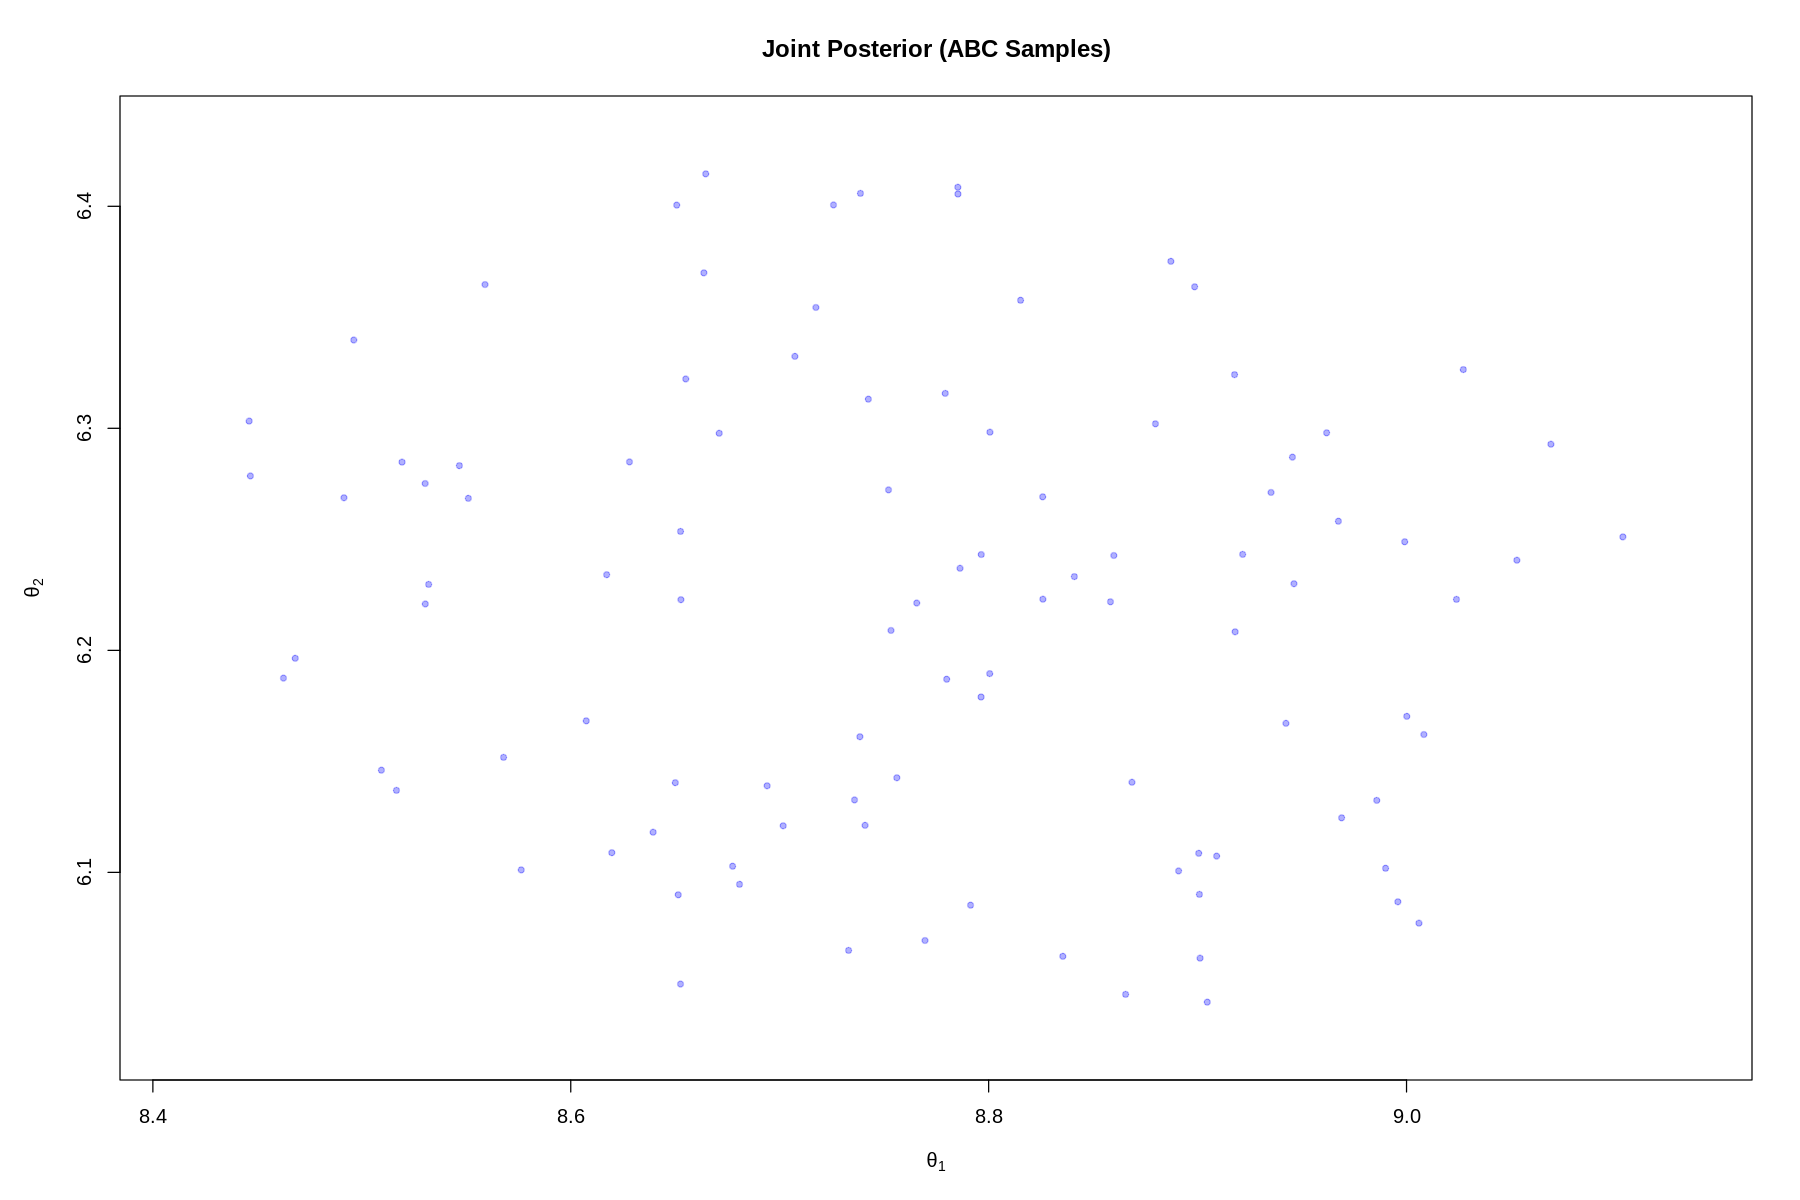

In [34]:
# Get axis limits based on the full range of posterior samples
xlim_theta1 <- range(posterior_samples$theta1)
xlim_theta2 <- range(posterior_samples$theta2)

# Optional: add a small margin to avoid cutoffs
margin1 <- diff(xlim_theta1) * 0.05
margin2 <- diff(xlim_theta2) * 0.05

xlim_theta1 <- c(xlim_theta1[1] - margin1, xlim_theta1[2] + margin1)
xlim_theta2 <- c(xlim_theta2[1] - margin2, xlim_theta2[2] + margin2)
options(repr.plot.width = 15, repr.plot.height = 10)
# Plot marginal posterior distributions
par(mfrow = c(1, 2), mar = c(5, 5, 4, 2))
hist(posterior_samples$theta1, breaks = 30,
     main = expression("Posterior of " * theta[1]),
     xlab = expression(theta[1]), col = "skyblue", border = "white",
     xlim = xlim_theta1)

hist(posterior_samples$theta2, breaks = 30,
     main = expression("Posterior of " * theta[2]),
     xlab = expression(theta[2]), col = "tomato", border = "white",
     xlim = xlim_theta2)

# Plot joint posterior distribution
par(mfrow = c(1, 1))
plot(posterior_samples$theta1, posterior_samples$theta2,
     xlab = expression(theta[1]), ylab = expression(theta[2]),
     main = "Joint Posterior (ABC Samples)",
     pch = 20, col = rgb(0, 0, 1, 0.3),
     xlim = xlim_theta1, ylim = xlim_theta2)

In [33]:
summary(posterior_samples)

     theta1          theta2     
 Min.   :8.446   Min.   :6.042  
 1st Qu.:8.652   1st Qu.:6.133  
 Median :8.774   Median :6.223  
 Mean   :8.768   Mean   :6.218  
 3rd Qu.:8.901   3rd Qu.:6.288  
 Max.   :9.104   Max.   :6.415  